1.Get data on titanic train
2.Use DT to create a decision  tree
3.Make comments on the values
4.Use python to build decision tree
5.Vary depth tree from 2,3,4,5,6 and 10
6. Comment and compare accuracy
7.Upload discussions,analysis and screenshots on a pdf

In [35]:

import pandas as pd
import numpy as np
import seaborn as sns


In [36]:
data = pd.read_csv('titanic_train.csv')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

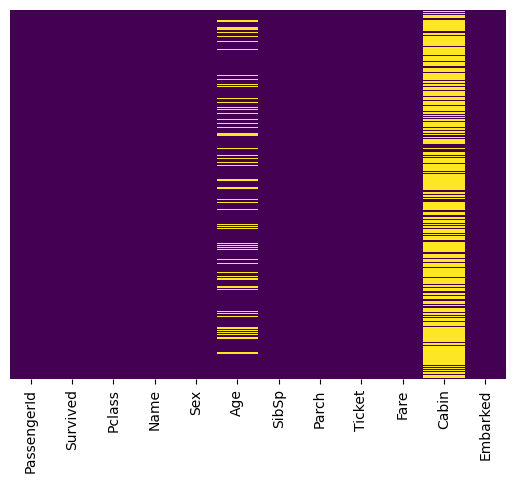

In [38]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Cleaning data before creating decision tree


In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            
            return 37
        
        elif Pclass == 2:
            
            return 29
        
        else:
            
            return 24
        
    else:
        
        return Age

In [42]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)
data.drop('Cabin',axis=1,inplace=True)  
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


<Axes: >

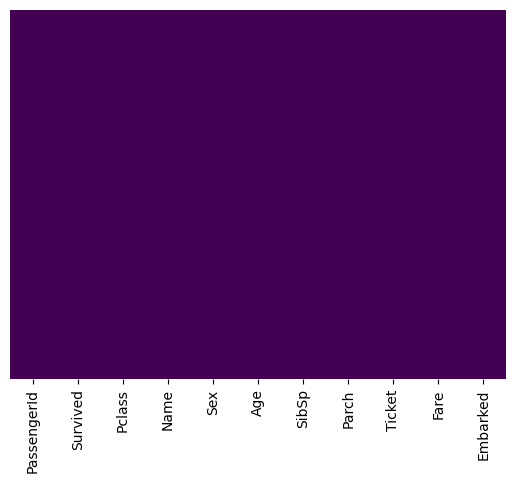

In [43]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We dont have any missimg data in this file now after cleaning the data as seen in the heatmap above

What features matter for us to make a decision tree?

Name, Sex, Age, Pclass

What we dont need: 

Sibsp (number of siblings and spouses), Parch (number of parents and children), Ticket, Fare, Cabin, and Embarked (which had port of embarkation) so we drop them to make our decision tree better. We will see what happens.


In [44]:
data.drop(['Ticket', 'Fare', 'Embarked', 'Parch','SibSp','PassengerId'], axis=1, inplace=True)


In [45]:
data

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0


In [46]:
from sklearn import tree

I'm changing the data under the Col Survived to be  1 = survived and 0 = not-survived

In [47]:
data['Survived'] = data['Survived'].replace({0: 'not-survived', 1: 'survived'})



In [48]:
data

,Survived,Pclass,Name,Sex,Age
0,not-survived,3,"Braund, Mr. Owen Harris",male,22.0
1,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,survived,3,"Heikkinen, Miss. Laina",female,26.0
3,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,not-survived,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,not-survived,2,"Montvila, Rev. Juozas",male,27.0
887,survived,1,"Graham, Miss. Margaret Edith",female,19.0
888,not-survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0
889,survived,1,"Behr, Mr. Karl Howell",male,26.0


We assign variable Y to be the column Survived in the 'data dataframe.

In [49]:
Y = data['Survived']


In [50]:
Y

0      not-survived
1          survived
2          survived
3          survived
4      not-survived
           ...     
886    not-survived
887        survived
888    not-survived
889        survived
890    not-survived
Name: Survived, Length: 891, dtype: object

In [51]:
X= data.drop(['Survived','Name'], axis=1)

In [52]:
X

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,24.0
889,1,male,26.0


Confirming the datatype  in this file

In [53]:
type(X)

pandas.core.frame.DataFrame

In [54]:
type(Y)

pandas.core.series.Series

We use clf to create a decision tree based on the data provided in the titanic.csv

In [55]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
clf.fit(X,Y)

ValueError: could not convert string to float: 'male'

Change male= 0 and Female =1 for this to work thats all the error is saying

In [59]:
X['Sex'] = X['Sex'].replace({'male': 0, 'female': 1})
X


,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
886,2,0,27.0
887,1,1,19.0
888,3,1,24.0
889,1,0,26.0


In [60]:
clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

it works now !

In [61]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [62]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'pydotplus'

In [64]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns,class_names=['survived','not-survived'], out_file=None, filled=True)

In [66]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Sex <= 0.5\\nentropy = 0.961\\nsamples = 891\\nvalue = [549, 342]\\nclass = survived", fillcolor="#f5cfb4"] ;\n1 [label="Pclass <= 1.5\\nentropy = 0.699\\nsamples = 577\\nvalue = [468, 109]\\nclass = survived", fillcolor="#eb9e67"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Age <= 36.5\\nentropy = 0.95\\nsamples = 122\\nvalue = [77, 45]\\nclass = survived", fillcolor="#f4cbad"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 41\\nvalue = [18, 23]\\nclass = not-survived", fillcolor="#d4eaf9"] ;\n2 -> 3 ;\n4 [label="entropy = 0.844\\nsamples = 81\\nvalue = [59, 22]\\nclass = survived", fillcolor="#efb083"] ;\n2 -> 4 ;\n5 [label="Age <= 9.5\\nentropy = 0.586\\nsamples = 455\\nvalue = [391, 64]\\nclass = survived", fillcolor="#e99659"] ;\n1 -> 5 ;\n6 [label="entropy = 0.987\\nsamples = 30\\nvalue = [13, 17]\\nclass = not-surv

In [67]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph

NameError: name 'pydotplus' is not defined

In [30]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [192]:
data

,Survived,Pclass,Name,Sex,Age
0,not-survived,3,"Braund, Mr. Owen Harris",male,22.0
1,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,survived,3,"Heikkinen, Miss. Laina",female,26.0
3,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,not-survived,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,not-survived,2,"Montvila, Rev. Juozas",male,27.0
887,survived,1,"Graham, Miss. Margaret Edith",female,19.0
888,not-survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0
889,survived,1,"Behr, Mr. Karl Howell",male,26.0


Creating a dataframe called testData that contains test data for the decison tree model. This is used to test the accuracy of our decision tree model.

In [31]:
testData = [
    ['not-survived',3,"Mr. James McCarthy",0,45],
    ['not-survived',3,"Mr. Timothy McCarthy",0,54],
    ['survived',1,"Mrs. Lily Potter",1,32],
    ['survived',2,"Mr. Harry Potter",0,22],
    ['survived',1,"Mrs. Hermione Granger",1,19],
    ['survived',2,"Mr. Ron Weasley",0,18],
    ['not-survived',3,"Mr. Draco Malfoy",0,20],
    ['survived',1,"Mrs. Ginny Weasley",1,37],
    ['survived',2,"Mr. Neville Longbottom",0,21],
    ['not-survived',3,"Mr. Vincent Crabbe",0,17],
    ['survived',1,"Mrs. Luna Lovegood",1,25],
    ['survived',2,"Mr. Dean Thomas",0,41],
    ['not-survived',3,"Mr. Seamus Finnigan",0,38],
    ['survived',1,"Mrs. Cho Chang",1,32],
    ['survived',2,"Mr. Cedric Diggory",0,30],
    ['not-survived',3,"Mr. Gregory Goyle",0,16],
    ['survived',1,"Mrs. Angelina Johnson",1,24],
    ['not-survived',3,"Mr. Oliver Wood",0,23],
    ['survived',1,"Mrs. Parvati Patil",1,35],
    ['survived',2,"Mr. Seamus Whiteman",0,61],
    ['not-survived',3,"Mr. Derick Thomas",0,41],
    ['survived',1,"Mrs. Hillary Duff",1,32],
    ['survived',2,"Mr. Charles Diggory",0,33],
    ['not-survived',3,"Mr. Peter Goyle",0,60],
    ['survived',1,"Mrs. Angelina Johnson",1,24],
    ['not-survived',3,"Mr. Brent Fiyaz",0,27],
    ['survived',1,"Mrs. Ari Lennox",1,35],
    ['survived',2,"Mr. Brad Pitt",0,33],
    ['not-survived',3,"Mr. Zain Malik",0,44],
    ['not-survived',2,"Mr. Harry Styles",0,51],
    ['survived',1,"Mrs. Taylor Swift",1,32],
    ['survived',2,"Mr. Louis Tomlinson",0,33],
    ['not-survived',3,"Mr. Niall Horan",0,44],
    ['survived',1,"Mr. Liam Payne",1,35],
    ['not-survived',3,"Mr. Idris Elba",0,45], 
    ['survived',1,"Mrs. Beyonce Knowles",1,32],
    ['not-survived',2,"Mr. Jay-Z",0,33],
    ['not-survived',1,"Mrs. Rihanna Fenty",1,35],
    ['survived',2,"Mr. Drake Graham",0,33],
    ['not-survived',1,"Mrs. Nicki Minaj",1,52],
    ['not-survived',2,"Mr. Aubrey Odell",0,43],
    ['survived',1,"Mrs. Cardi Belcalis",1,32],
    ['survived',2,"Mr. Offset Cephus",0,44]
]

In [32]:
testData

[['not-survived', 3, 'Mr. James McCarthy', 0, 45],
 ['not-survived', 3, 'Mr. Timothy McCarthy', 0, 54],
 ['survived', 1, 'Mrs. Lily Potter', 1, 32],
 ['survived', 2, 'Mr. Harry Potter', 0, 22],
 ['survived', 1, 'Mrs. Hermione Granger', 1, 19],
 ['survived', 2, 'Mr. Ron Weasley', 0, 18],
 ['not-survived', 3, 'Mr. Draco Malfoy', 0, 20],
 ['survived', 1, 'Mrs. Ginny Weasley', 1, 37],
 ['survived', 2, 'Mr. Neville Longbottom', 0, 21],
 ['not-survived', 3, 'Mr. Vincent Crabbe', 0, 17],
 ['survived', 1, 'Mrs. Luna Lovegood', 1, 25],
 ['survived', 2, 'Mr. Dean Thomas', 0, 41],
 ['not-survived', 3, 'Mr. Seamus Finnigan', 0, 38],
 ['survived', 1, 'Mrs. Cho Chang', 1, 32],
 ['survived', 2, 'Mr. Cedric Diggory', 0, 30],
 ['not-survived', 3, 'Mr. Gregory Goyle', 0, 16],
 ['survived', 1, 'Mrs. Angelina Johnson', 1, 24],
 ['not-survived', 3, 'Mr. Oliver Wood', 0, 23],
 ['survived', 1, 'Mrs. Parvati Patil', 1, 35],
 ['survived', 2, 'Mr. Seamus Whiteman', 0, 61],
 ['not-survived', 3, 'Mr. Derick Thoma

making it into a dataFrame 

In [35]:
testData = pd.DataFrame(testData,columns=data.columns)

In [36]:
testData

,Survived,Pclass,Name,Sex,Age
0,not-survived,3,Mr. James McCarthy,0,45
1,not-survived,3,Mr. Timothy McCarthy,0,54
2,survived,1,Mrs. Lily Potter,1,32
3,survived,2,Mr. Harry Potter,0,22
4,survived,1,Mrs. Hermione Granger,1,19
5,survived,2,Mr. Ron Weasley,0,18
6,not-survived,3,Mr. Draco Malfoy,0,20
7,survived,1,Mrs. Ginny Weasley,1,37
8,survived,2,Mr. Neville Longbottom,0,21
9,not-survived,3,Mr. Vincent Crabbe,0,17


`testY` is a variable that contains the values of the `Survived` column of the `testData` dataframe. It is used to compare the predicted values of the decision tree model with the actual values of the `Survived` column in the test data.

In [37]:
testY=testData['Survived']

In [38]:
testY

0     not-survived
1     not-survived
2         survived
3         survived
4         survived
5         survived
6     not-survived
7         survived
8         survived
9     not-survived
10        survived
11        survived
12    not-survived
13        survived
14        survived
15    not-survived
16        survived
17    not-survived
18        survived
19        survived
20    not-survived
21        survived
22        survived
23    not-survived
24        survived
25    not-survived
26        survived
27        survived
28    not-survived
29    not-survived
30        survived
31        survived
32    not-survived
33        survived
34    not-survived
35        survived
36    not-survived
37    not-survived
38        survived
39    not-survived
40    not-survived
41        survived
42        survived
Name: Survived, dtype: object

`testX` is a variable that contains the values of the `PClass`, `Sex`,`Age`, column of the `testData` dataframe. It is used to compare the predicted values of the decision tree model with the actual values of the same columns in the test data. We omitt  both `Name` and  `Survived`

In [40]:
testX=testData.drop(['Survived','Name'], axis=1)

In [41]:
testX

,Pclass,Sex,Age
0,3,0,45
1,3,0,54
2,1,1,32
3,2,0,22
4,1,1,19
5,2,0,18
6,3,0,20
7,1,1,37
8,2,0,21
9,3,0,17


The lines below we have variable PredY where we use the `predict()` method int he clf object to  predict the valuse of the `Survived` column for the testData stored in testX. 

In [44]:
predY = clf.predict(testX)
predY

array(['not-survived', 'not-survived', 'survived', 'not-survived',
       'survived', 'not-survived', 'not-survived', 'survived',
       'not-survived', 'not-survived', 'survived', 'not-survived',
       'not-survived', 'survived', 'not-survived', 'not-survived',
       'survived', 'not-survived', 'survived', 'not-survived',
       'not-survived', 'survived', 'not-survived', 'not-survived',
       'survived', 'not-survived', 'survived', 'not-survived',
       'not-survived', 'not-survived', 'survived', 'not-survived',
       'not-survived', 'survived', 'not-survived', 'survived',
       'not-survived', 'survived', 'not-survived', 'survived',
       'not-survived', 'survived', 'not-survived'], dtype=object)

This code creates a new dataframe called `predictions` by concatenating three columns from the `testData` dataframe and a new column called `Predicted Survival`. The three columns are `Name`, `Survived`, and `predY`. 

The `predY` column contains the predicted values of the `Survived` column for the `testData` dataframe. 

The resulting dataframe `predictions` contains four columns: `Name`, `Survived`, `Predicted Survival`, and the index column. 

The `predictions` dataframe is then printed to the console.

In [45]:
predictions=pd.concat([testData['Name'],testData['Survived'],
                       pd.Series(predY, name='Predicted Survival')],axis=1)

predictions

,Name,Survived,Predicted Survival
0,Mr. James McCarthy,not-survived,not-survived
1,Mr. Timothy McCarthy,not-survived,not-survived
2,Mrs. Lily Potter,survived,survived
3,Mr. Harry Potter,survived,not-survived
4,Mrs. Hermione Granger,survived,survived
5,Mr. Ron Weasley,survived,not-survived
6,Mr. Draco Malfoy,not-survived,not-survived
7,Mrs. Ginny Weasley,survived,survived
8,Mr. Neville Longbottom,survived,not-survived
9,Mr. Vincent Crabbe,not-survived,not-survived


We import the accuaracy_score function from the sklearn.metrics module in the scikit-learn library. After this we have check the accuracy of the models predicitions by checking the correct predicitions out of ttal predicitions to two decimal places.

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print('The accuracy of the model is %.2f'%(accuracy_score(testY,predY)))

The accuracy of the model is 0.70


What I noticed is that when increasing the depth of our tree our Acurracy became lower for depth 10 the accuracy was 0.65  from an accuracy of 0.7 with a depth of 3.